In [70]:
import scipy.sparse as sparse
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sympy
import scipy.special as sps


In [3]:
x = 4

for n in range(1,x+1):
    lege = sps.legendre(n)
    print(lege)
    sum = 0
    sum -= lege[0]
    for i in range(n):
        if(lege[i+1] != 0):sum /= lege[i+1]
    x = sum
    print(f"i = {n} ==>> x = {x}".format(n, x), "\n" "------------")



 
1 x
i = 1 ==>> x = 0.0 
------------
     2
1.5 x - 0.5
i = 2 ==>> x = 0.3333333333333333 
------------
     3
2.5 x - 1.5 x
i = 3 ==>> x = -0.0 
------------
       4             3        2
4.375 x + 4.857e-16 x - 3.75 x + 2.429e-16 x + 0.375
i = 4 ==>> x = 1.9376501396281573e+29 
------------


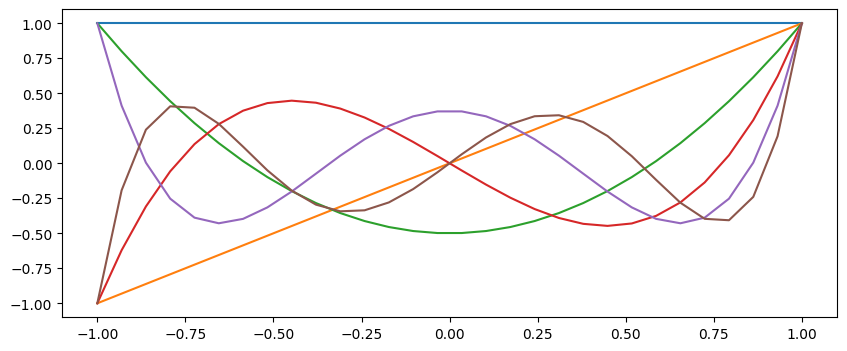

In [29]:
X = np.linspace(-1,1,30)
x = 5
fig, ax = plt.subplots(figsize=(10,4))
for n in range(x+1):
        lege = sps.legendre(n) 
        Y = lege(X)
        ax.plot(X,Y)
plt.show()

2.  Vyrobte sparse matici o rozměrech (n**2 x n**2)

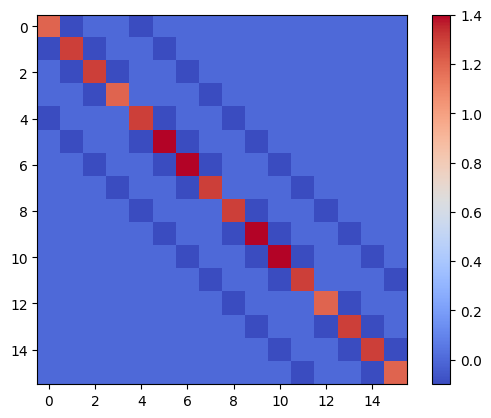

In [66]:
import scipy.sparse as sparse
import numpy as np
import matplotlib.pyplot as plt

def vyp_eps(i,j):
    odecti = 0
    if(i==0 or j==0 or i==n-1 or j==n-1): odecti += epsilon
    if((i==0 and j==0) or (i==0 and j==n-1) or (i==n-1 and j==0) or (i==n-1 and j==n-1)): odecti += epsilon
    return odecti

n = 4
epsilon = 1e-1
A = sparse.lil_matrix((n*n, n*n))
for i in range(n):
    for j in range(n):
        if(j+n+(n*i)<n*n): A[j+(n*i),j+n+(n*i)] = -epsilon
        if(j+n+(n*i)<n*n): A[j+n+(n*i), j+(n*i)] = -epsilon
        if(i != n-1): A[n*j+i,n*j+1+i] = -epsilon
        if(i != n-1): A[n*j+1+i,n*j+i] = -epsilon
        A[i*n+j,i*n+j] = ((1+epsilon*4) - vyp_eps(i,j) )

#print(A.todense())
plt.imshow(A.todense(), cmap='coolwarm')
plt.colorbar()
plt.show()

3.Ukol

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


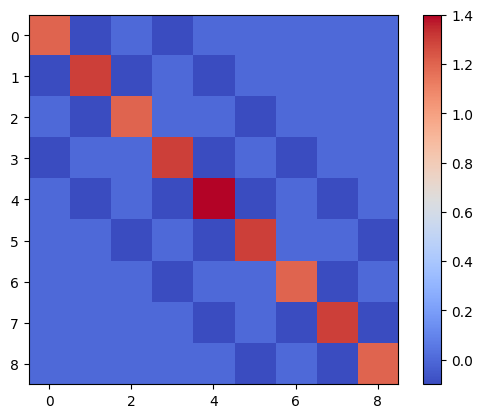

In [68]:
import numpy as np
from scipy.sparse import csr_matrix

def A_efficiently(n, epsilon):
    horizontal_up_idx = np.arange(0,n*n-n)
    horizontal_low_idx = np.arange(n,n*n)
    row_horizontal = np.hstack((horizontal_up_idx, horizontal_low_idx))
    col_horizontal = np.hstack((horizontal_low_idx, horizontal_up_idx))
    data_horizontal = -epsilon * np.ones(2 * (n * n - n))

    vertical_left_idx = (np.arange(n*n).reshape((n, n)).T.flatten())[0:n**2-n:1]
    vertical_right_idx =  (np.arange(n * n).reshape((n, n)).T.flatten())[n::1]
    row_vertical =  np.hstack((vertical_left_idx, vertical_right_idx))
    col_vertical = np.hstack((vertical_right_idx, vertical_left_idx))
    data_vertical = -epsilon * np.ones(2 * (n * n - n))

    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    data_diag[:n] -= epsilon 
    data_diag[-n:] -= epsilon
    data_diag[0:n*n:n] -= epsilon
    data_diag[n-1:n*n:n] -= epsilon

    row = np.hstack((row_horizontal,row_vertical,row_idx_diag))
    col = np.hstack((col_horizontal,col_vertical,col_idx_diag))
    data = np.hstack((data_horizontal,data_vertical,data_diag))

    A_efficiently = csr_matrix((data,(row,col)))
    return A_efficiently

n = 3
epsilon = 0.1
print(A_efficiently(n, epsilon).todense())
plt.imshow(A_efficiently(n, epsilon).todense(), cmap='coolwarm')
plt.colorbar()
plt.show()

4.Ukol

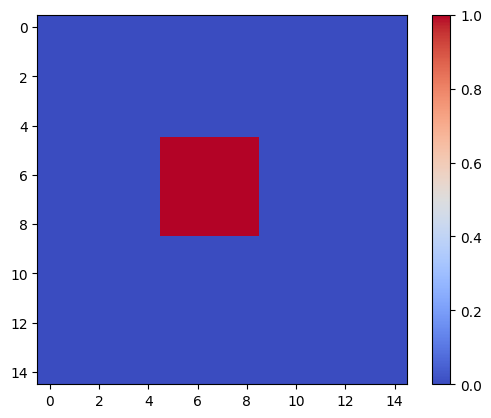

In [102]:
import matplotlib.pyplot as plt

n = 15
epsilon = 2e-1
A = A_efficiently(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
#print(b.reshape((n,n)))
plt.imshow(b.reshape((n, n)), cmap='coolwarm')
plt.colorbar()
plt.show()

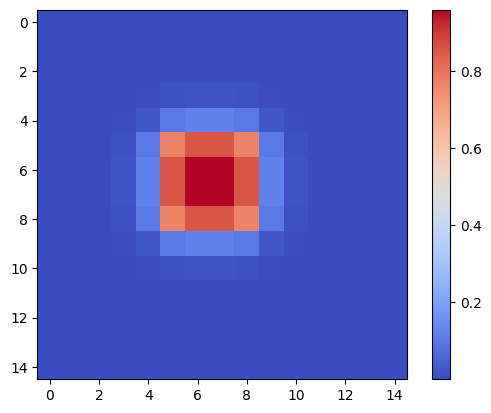

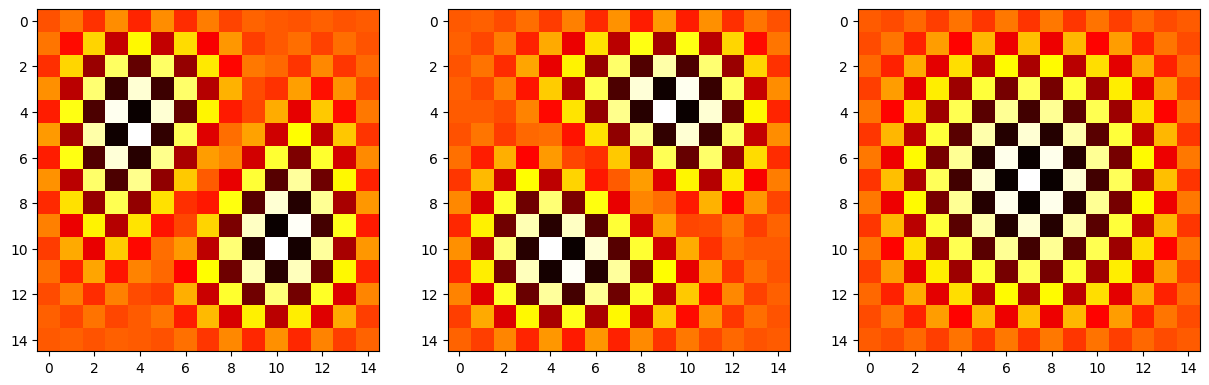

In [146]:
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import eigsh

x = spsolve(A, b)
plt.imshow(x.reshape(n,n), cmap='coolwarm')
plt.colorbar()
plt.show()

pocet_vlastnich_vektoru= 3
w, v = eigsh(A, k=pocet_vlastnich_vektoru,which='LM')

fig, axs = plt.subplots(ncols=pocet_vlastnich_vektoru, figsize=(15,5))

for i in range(pocet_vlastnich_vektoru):
    vector = np.real(v[:,i])
    axs[i].imshow(vector.reshape((n,n)), cmap='hot')
    #axs[i].set


5. Ukol

In [164]:
import scipy.optimize as opt
"""""
X = np.linspace(-1,1,30)
x = 5
lege = sps.legendre(x) 
for i in range(1,x+1):
    x_root = opt.fsolve(func=lege, x0=i)
    print(x_root)
"""""
x = 5
f = sps.legendre(x) 
a, b = -1,1 
resolution = 1000

x_vals = np.linspace(a, b, resolution)
sign_changes = []

for i in range(len(x_vals) - 1):
    if(np.sign(f(x_vals[i])) != np.sign(f(x_vals[i + 1]))):
        sign_changes.append((x_vals[i], x_vals[i + 1]))

roots = []
for interval in sign_changes:
    result = opt.root_scalar(f, bracket=interval)
    roots.append(result.root)

roots = np.array(roots)

for i in range(len(roots)):
    print(f"Kořen {i} v bodě {roots[i]} s hodntou {f(roots[i])}")

Kořen 0 v bodě -0.9061798459386633 s hodntou 3.552713678800501e-15
Kořen 1 v bodě -0.538469310105683 s hodntou -3.3306690738754696e-16
Kořen 2 v bodě 7.025630077706069e-17 s hodntou 1.3173056395698881e-16
Kořen 3 v bodě 0.5384693101056831 s hodntou 5.551115123125783e-17
Kořen 4 v bodě 0.9061798459386634 s hodntou -3.9968028886505635e-15


6.Ukol

In [196]:
import sympy as sp

x = sp.Symbol('x')
legendre_5 = sp.legendre(5, x)
root = sp.solve(legendre_5,x)
for r in roots:
    print(f"{r:.5f} neboli {r}")

0.00000 neboli 0
-0.53847 neboli -sqrt(5/9 - 2*sqrt(70)/63)
0.53847 neboli sqrt(5/9 - 2*sqrt(70)/63)
-0.90618 neboli -sqrt(2*sqrt(70)/63 + 5/9)
0.90618 neboli sqrt(2*sqrt(70)/63 + 5/9)


Když porovnáme hodnoty s minulým úkolem tak zjistíme, že oba způsoby jsou skoro totožné. Výsledky jsou pouze v jiné formě.